In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# Load epidemic italian data

In [2]:
from src.load_data import get_epidemic_data

In [3]:
df_epidemic = get_epidemic_data('Italy')

# the epidemic in Italy started on the 23th of February 2020
df_epidemic = df_epidemic[df_epidemic.index >= '2020-02-23']

df_epidemic.head()

,Total cases,Active infected,Total deaths,Total recovered,Daily cases (avg 7 days),Daily deaths (avg 7 days)
2020-02-23,155.0,150.0,3.0,2.0,21.7,0.4
2020-02-24,229.0,221.0,7.0,1.0,32.3,1.0
2020-02-25,322.0,311.0,10.0,1.0,45.6,1.4
2020-02-26,453.0,438.0,12.0,3.0,64.3,1.7
2020-02-27,655.0,593.0,17.0,45.0,93.1,2.4


# Fit the epidemiological model

In [4]:
from src.epi_model import SIR2
from src.optimizer import fit_model

In [5]:
# We want to fit the 1st wave in Italy, therefore tmax=120 (5 months since the beginning)

tmax = 150

# true data
ydata_cases = np.array(df_epidemic['Total cases'])[0:tmax]
ydata_inf = np.array(df_epidemic['Active infected'])[0:tmax]
ydata_rec = (np.array(df_epidemic['Total recovered'])+np.array(df_epidemic['Total deaths']))[0:tmax]

 
inhabitants_italy = 60*10**6
 
minpar = fit_model(y_data = [ydata_cases,ydata_inf,ydata_rec],
                   inhabitants=inhabitants_italy)

Optimization terminated successfully.
         Current function value: 5063.201729
         Iterations: 197
         Function evaluations: 362
The average error of the model is 6.4 %


In [6]:
beta = round(minpar[0],3)
gamma = round(minpar[1],3)
tau = round(minpar[2],1)

print('Parametri ottimizzati: beta',beta,'gamma',gamma,'tau',tau)

Parametri ottimizzati: beta 0.413 gamma 0.031 tau 21.7


In [7]:
model_check = SIR2(inhabitants_italy,minpar[0],minpar[1],minpar[2],
              vacc_eff=0,vacc_speed=0,t0=0,  
              I0=ydata_inf[0],R0=ydata_rec[0],V0=0)

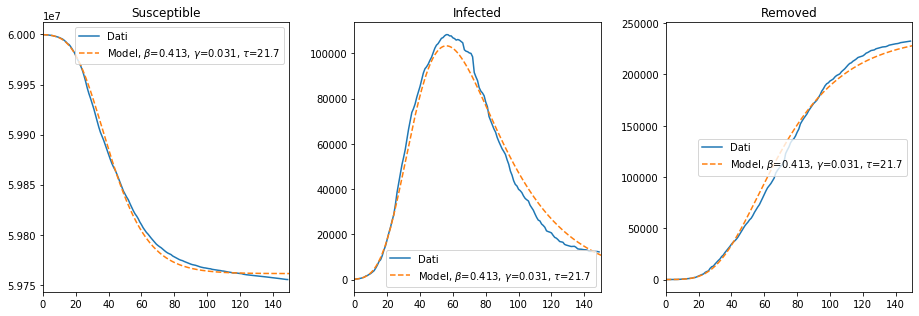

In [8]:
# check del modello, con curve di suscettibili, infetti e rimossi

plt.figure(figsize=(13,4.5))
plt.subplot(1,3,1)
plt.plot(inhabitants_italy-ydata_cases,label='Dati')
plt.plot(model_check[1],
         linestyle='--',label='Model, $\\beta$='+str(beta)+', $\gamma$='+str(gamma)+', $\\tau$='+str(tau))
plt.title('Susceptible')
plt.xlim(0,tmax)
plt.legend()
plt.subplot(1,3,2)
plt.plot(ydata_inf,label='Dati')
plt.plot(model_check[2],
         linestyle='--',label='Model, $\\beta$='+str(beta)+', $\gamma$='+str(gamma)+', $\\tau$='+str(tau))
plt.title('Infected')
plt.xlim(0,tmax)
plt.legend()
plt.subplot(1,3,3)
plt.plot(ydata_rec,label='Dati')
plt.plot(model_check[3],
         linestyle='--',label='Model, $\\beta$='+str(beta)+', $\gamma$='+str(gamma)+', $\\tau$='+str(tau))
plt.title('Removed')
plt.xlim(0,tmax)
plt.legend()
plt.tight_layout()
plt.savefig('results/check_model_italy.png',dpi=300)
plt.show()